In [0]:
# Import the useful libraries 
import numpy as np
import pandas as pd
import os
from random import randint
import matplotlib.pyplot as plt
from google.colab import files
import time

In [0]:
# Define R Matrix 

R = np.matrix([[0, 0, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                [0, 0, 0, np.nan, 0, 0, np.nan, np.nan, np.nan, np.nan, np.nan],
                [np.nan, 0, 0, 0, np.nan, np.nan, 100, np.nan, np.nan, np.nan, np.nan],
                [np.nan, np.nan, 0, 0, np.nan, np.nan, 100, np.nan, np.nan, np.nan, np.nan],
                [0, 0, np.nan, np.nan, 0, 0, np.nan, np.nan, 0, 0, np.nan],
                [np.nan, 0, np.nan, np.nan, 0, 0, 100, 0, np.nan, np.nan, np.nan],
                [np.nan, np.nan, 0, 0, np.nan, 0, 100, 0, np.nan, np.nan, np.nan],
                [np.nan, np.nan, np.nan, np.nan, np.nan, 0, 100, 0, np.nan, np.nan, 0],
                [np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, 0, 0, np.nan],
                [np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, 0, 0, 0],
                [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, np.nan, 0, 0]])

print(R)

[[  0.   0.  nan  nan   0.  nan  nan  nan  nan  nan  nan]
 [  0.   0.   0.  nan   0.   0.  nan  nan  nan  nan  nan]
 [ nan   0.   0.   0.  nan  nan 100.  nan  nan  nan  nan]
 [ nan  nan   0.   0.  nan  nan 100.  nan  nan  nan  nan]
 [  0.   0.  nan  nan   0.   0.  nan  nan   0.   0.  nan]
 [ nan   0.  nan  nan   0.   0. 100.   0.  nan  nan  nan]
 [ nan  nan   0.   0.  nan   0. 100.   0.  nan  nan  nan]
 [ nan  nan  nan  nan  nan   0. 100.   0.  nan  nan   0.]
 [ nan  nan  nan  nan   0.  nan  nan  nan   0.   0.  nan]
 [ nan  nan  nan  nan   0.  nan  nan  nan   0.   0.   0.]
 [ nan  nan  nan  nan  nan  nan  nan   0.  nan   0.   0.]]


In [0]:
# Initialise Q Matrix 
Q = np.matrix(np.zeros([11,11]))

print(Q)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
# Q-learning algorithm

def q_learning(alpha, gamma, epsilon, decay):
    
  # initialise current state in random
  current_state = randint(0, 10)
  
  # check available actions in the current state
  current_state_row = R[current_state,]
  av_act = np.where(current_state_row >= 0)[1]
  
  # if Q-matrix is 0, select random, else follow epsilon greedy policy
  if Q[current_state, :].sum() == 0:
    action = np.random.choice(av_act, size=1)
  
  else:
    if np.random.uniform(0,1) < epsilon:
      action = np.random.choice(av_act, size=1)
    else:
      action = np.argmax(Q[current_state, :])
    
  # find max Q value after action
  next_state_row = R[action,]
  next_av_act = np.where(next_state_row >= 0)[1]
  
  if Q[action, :].sum() == 0:
    next_action = np.random.choice(next_av_act, size=1)
  
  else:
    next_action = np.argmax(Q[action, :])
  
  # update Q-matrix
  Q[current_state, action] = Q[current_state, action] + alpha * (R[current_state, action] + gamma * Q[action, next_action] - Q[current_state, action])
  
  # return Q-matrix and number of steps
  return Q, alpha, gamma, epsilon, decay 

In [0]:
# Evaluation function

def evaluate(Q, episode, alpha, gamma, epsilon, decay):
  
  # initiate current state
#   current_state = randint(0,10)
  current_state = 8
  steps = [current_state]
  reward = 0
  
  # set rule if initiated from Station 7
  if current_state == 6:
    reward += np.max(Q[current_state, :])
  
  # step for start from other stations
  else:
    while current_state != 6:
      
      # check available actions 
      current_state_row = R[current_state, :]
      av_act = np.where(current_state_row >= 0)[1]
      
      # when Q-matrix is 0, select randomly from available actions
      if Q[current_state, av_act].sum() == 0:
        next_step = int(np.random.choice(av_act, size=1))
      
      # when Q-matrix is not 0, select the best action or one of the best actions
      else:
        
        # index for maximum value
        max_index = np.where(Q[current_state,:] == np.max(Q[current_state, av_act]))[1]
        
        # if more than 1 max value, randomly choose one; otherwise, choose the max value
        if max_index.shape[0] > 1:
          next_step = int(np.random.choice(max_index, size = 1))
        else:
          next_step = int(max_index)
      
      # append next action and reward
      next_reward = np.max(Q[current_state, next_step])
      
      steps.append(next_step)
      reward += next_reward
      current_state = next_step
      
  
  average_reward.append((episode, alpha, gamma, epsilon, decay, reward/len(steps)))  
  step_cont.append((episode, alpha, gamma, epsilon, decay, len(steps)))
  
  return average_reward, step_cont
#   return average_reward, step_cont, steps, reward, Q

In [0]:
# Define initial parameters 
alphas = [0.8, 0.9] # alpha is the learning rate
gammas = [0.8] # gamma is the discount factor 
epsilons = [0.7, 0.9] # epsilon is the exploration factor
decays = [0.99, 0.999] # df is the decay factor for epsilon

In [0]:
for alpha in alphas:
  for gamma in gammas:
    for decay in decays:
      for epsilon in epsilons:
        print(alpha,gamma,epsilon,decay)

0.8 0.8 0.7 0.99
0.8 0.8 0.9 0.99
0.8 0.8 0.7 0.999
0.8 0.8 0.9 0.999
0.9 0.8 0.7 0.99
0.9 0.8 0.9 0.99
0.9 0.8 0.7 0.999
0.9 0.8 0.9 0.999


In [0]:
# Iteration and produce Q-matrix

average_reward = []
step_cont = []
# optimal = []
# all_steps = []
# total_reward = []
# Q_matrix = []

start = time.time()

for alpha in alphas:
  for gamma in gammas:
    for decay in decays:
      for epsilon in epsilons:
        for episode in range(1000):

          Q, alpha, gamma, epsilon, decay = q_learning(alpha, gamma, epsilon, decay)
    
          if np.matrix.max(Q) > 0:
            Q_norm = (Q/np.matrix.max(Q)*100)
          else:
            Q_norm = Q

          
          average_reward, step_cont = evaluate(Q_norm, episode, alpha, gamma, epsilon, decay)
          epsilon *= decay
#           optimal.append((episode, alpha, gamma, epsilon, decay, ((Q_norm[8,4]+Q_norm[4,5]+Q_norm[5,6])/4)))
#           average_reward, step_cont, steps, reward, Q_ = evaluate(Q_norm, episode, alpha, gamma, epsilon, decay)
#           Q_matrix.append(Q_)
#           all_steps.append(steps)
#           total_reward.append(reward)
      
        Q = np.matrix(np.zeros([11,11]))
      # Reset the Q-matrix and epsilon to initial value
      epsilon = epsilon
          
end = time.time()
                  
print(Q_norm.astype(int))
# print(average_reward)
# print(step_cont)
print('Time used :', end-start, 'seconds')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal


[[ 50  63   0   0  63   0   0   0   0   0   0]
 [ 51  63  79   0  63  79   0   0   0   0   0]
 [  0  63  79  79   0   0  99   0   0   0   0]
 [  0   0  79  79   0   0  99   0   0   0   0]
 [ 51  60   0   0  63  79   0   0  50  50   0]
 [  0  63   0   0  63  79  99  79   0   0   0]
 [  0   0  79  79   0  79  99  79   0   0   0]
 [  0   0   0   0   0  79 100  79   0   0  63]
 [  0   0   0   0  63   0   0   0  51  51   0]
 [  0   0   0   0  63   0   0   0  51  51  63]
 [  0   0   0   0   0   0   0  79   0  51  63]]
Time used : 3.469984292984009 seconds


In [0]:
# Turn results into Q-matrix

df_reward = pd.DataFrame.from_records(average_reward, columns = ['episode', 'alpha', 'gamma', 'epsilon', 'decay', 'Average Reward Per Step'])
df_step = pd.DataFrame.from_records(step_cont, columns = ['episode', 'alpha', 'gamma', 'epsilon', 'decay','Steps'])
# df_optimal = pd.DataFrame.from_records(optimal, columns = ['episode', 'alpha', 'gamma', 'epsilon', 'decay','Optimal'])

df = pd.merge(df_reward, df_step, on=['episode', 'alpha', 'gamma', 'epsilon', 'decay'])
# df = pd.merge(df, df_optimal, on=['episode', 'alpha', 'gamma', 'epsilon', 'decay'])
print(df.shape)
df.head(5)

(8000, 7)


,episode,alpha,gamma,epsilon,decay,Average Reward Per Step,Steps
0,0,0.8,0.8,0.700000,0.99,0.0,13
1,1,0.8,0.8,0.693000,0.99,0.0,8
2,2,0.8,0.8,0.686070,0.99,0.0,56
3,3,0.8,0.8,0.679209,0.99,0.0,28
4,4,0.8,0.8,0.672417,0.99,0.0,26


In [0]:
# df.to_excel('grid_search.xlsx')
# files.download('grid_search.xlsx')

In [0]:
# Preparation before plot

df.iloc[0:1000, df.columns.get_loc('epsilon')]=0.7
df.iloc[1000:2000, df.columns.get_loc('epsilon')]=0.9
df.iloc[2000:3000, df.columns.get_loc('epsilon')]=0.7
df.iloc[3000:4000, df.columns.get_loc('epsilon')]=0.9
df.iloc[4000:5000, df.columns.get_loc('epsilon')]=0.7
df.iloc[5000:6000, df.columns.get_loc('epsilon')]=0.9
df.iloc[6000:7000, df.columns.get_loc('epsilon')]=0.7
df.iloc[7000:8000, df.columns.get_loc('epsilon')]=0.9

In [0]:
# df_stats = df[['alpha','gamma','epsilon','decay','Average Reward Per Step']]

In [0]:
# df_stats_1 = df_stats.groupby(['alpha','gamma','epsilon','decay']).describe().round(decimals=1)
# df_stats_1

In [0]:
# Preparation before plot

df_1 = df.iloc[0:1000, :]
df_2 = df.iloc[1000:2000, :]
df_3 = df.iloc[2000:3000, :]
df_4 = df.iloc[3000:4000, :]
df_5 = df.iloc[4000:5000, :]
df_6 = df.iloc[5000:6000, :]
df_7 = df.iloc[6000:7000, :]
df_8 = df.iloc[7000:8000, :]

In [0]:
# Preparation before plot

df_1 = df_1.rename(columns={'Average Reward Per Step': r'$\alpha=0.8$,$\gamma=0.8$,$\epsilon=0.7$,df=0.99'})
df_2 = df_2.rename(columns={'Average Reward Per Step': r'$\alpha=0.8$,$\gamma=0.8$,$\epsilon=0.9$,df=0.99'})
df_3 = df_3.rename(columns={'Average Reward Per Step': r'$\alpha=0.8$,$\gamma=0.8$,$\epsilon=0.7$,df=0.999'})
df_4 = df_4.rename(columns={'Average Reward Per Step': r'$\alpha=0.8$,$\gamma=0.8$,$\epsilon=0.9$,df=0.999'})
df_5 = df_5.rename(columns={'Average Reward Per Step': r'$\alpha=0.9$,$\gamma=0.8$,$\epsilon=0.7$,df=0.99'})
df_6 = df_6.rename(columns={'Average Reward Per Step': r'$\alpha=0.9$,$\gamma=0.8$,$\epsilon=0.9$,df=0.99'})
df_7 = df_7.rename(columns={'Average Reward Per Step': r'$\alpha=0.9$,$\gamma=0.8$,$\epsilon=0.7$,df=0.999'})
df_8 = df_8.rename(columns={'Average Reward Per Step': r'$\alpha=0.9$,$\gamma=0.8$,$\epsilon=0.9$,df=0.999'})

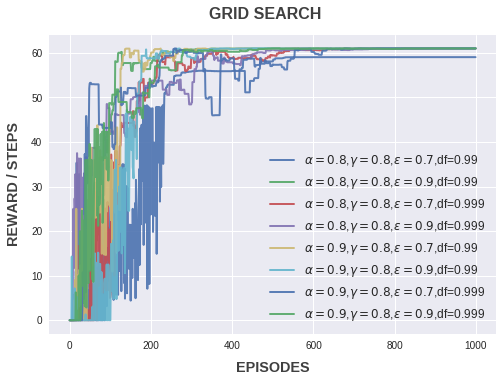

In [0]:
# Plot average reward per step

plt.style.use('seaborn')

fig, ax = plt.subplots()

ax.plot(df_1['episode'], df_1[r'$\alpha=0.8$,$\gamma=0.8$,$\epsilon=0.7$,df=0.99'], linewidth=2, alpha=0.9)
ax.plot(df_2['episode'], df_2[r'$\alpha=0.8$,$\gamma=0.8$,$\epsilon=0.9$,df=0.99'], linewidth=2, alpha=0.9)
ax.plot(df_3['episode'], df_3[r'$\alpha=0.8$,$\gamma=0.8$,$\epsilon=0.7$,df=0.999'], linewidth=2, alpha=0.9)
ax.plot(df_4['episode'], df_4[r'$\alpha=0.8$,$\gamma=0.8$,$\epsilon=0.9$,df=0.999'], linewidth=2, alpha=0.9)
ax.plot(df_5['episode'], df_5[r'$\alpha=0.9$,$\gamma=0.8$,$\epsilon=0.7$,df=0.99'], linewidth=2, alpha=0.9)
ax.plot(df_6['episode'], df_6[r'$\alpha=0.9$,$\gamma=0.8$,$\epsilon=0.9$,df=0.99'], linewidth=2, alpha=0.9)
ax.plot(df_7['episode'], df_7[r'$\alpha=0.9$,$\gamma=0.8$,$\epsilon=0.7$,df=0.999'], linewidth=2, alpha=0.9)
ax.plot(df_8['episode'], df_8[r'$\alpha=0.9$,$\gamma=0.8$,$\epsilon=0.9$,df=0.999'], linewidth=2, alpha=0.9)

fig.suptitle('GRID SEARCH', color='#404040', fontsize=16, y=0.95, fontweight='bold')
ax.set_xlabel('EPISODES', color='#404040', fontsize='large', fontweight='bold', labelpad=10)
ax.set_ylabel('REWARD / STEPS', color='#404040', fontsize='large', fontweight='bold', labelpad=10)

ax.legend(loc='lower right', fontsize='medium')

plt.show()

In [0]:
df_11 = df.iloc[500:1000, :]
df_22 = df.iloc[1500:2000, :]
df_33 = df.iloc[2500:3000, :]
df_44 = df.iloc[3500:4000, :]
df_55 = df.iloc[4500:5000, :]
df_66 = df.iloc[5500:6000, :]
df_77 = df.iloc[6500:7000, :]
df_88 = df.iloc[7500:8000, :]

In [0]:
df_500 = pd.concat([df_11,df_22,df_33,df_44,df_55,df_66,df_77,df_88])
df_500.head(5)

,episode,alpha,gamma,epsilon,decay,Average Reward Per Step,Steps
500,500,0.8,0.8,0.7,0.99,58.083387,5
501,501,0.8,0.8,0.7,0.99,58.503638,5
502,502,0.8,0.8,0.7,0.99,58.503681,5
503,503,0.8,0.8,0.7,0.99,58.506747,5
504,504,0.8,0.8,0.7,0.99,58.506747,5


In [0]:
df_stats_500 = df_500[['alpha','gamma','epsilon','decay','Average Reward Per Step']]

In [0]:
df_stats_500_1 = df_stats_500.groupby(['alpha','gamma','epsilon','decay']).mean()
df_stats_500_1

Average Reward Per Step
alpha gamma epsilon decay                         
0.8   0.8   0.7     0.990                59.019187
                    0.999                60.834362
            0.9     0.990                60.999803
                    0.999                60.861579
0.9   0.8   0.7     0.990                60.995619
                    0.999                60.509967
            0.9     0.990                60.996559
                    0.999                60.957358

In [0]:
# df_stats_500_1.to_excel('df_stats_500.xlsx')
# files.download('df_stats_500.xlsx')